# EBS 2025 analysis

This is a quick (and dirty) analysis of the results of the European Beer Star 2025.

The CSV is a version of the EBS results table converted to CSV and translated to English where this was not yet the case. I added the Style Origin column, which is a hand-wavy categorization based on, roughly:
1. **Central European:** This includes all categories that specify they're "(South-)German(/Franconian) Style", including also Alt, as well as the Austrian, Polish and Czech categories. This is by far the largest category, containing 32 categories.
2. **Belgian:** All the traditionally Belgian styles (monastic, but also Wit, Saison), including all sours (even though some sour categories would include some non-Belgian sour styles) and all beer with non-grain additives like spices, herbs and honey. There are 13 Belgian categories.
3. **British:** All styles originating from the British beer tradition, including red ale, bitters and all categories containing porters and stouts, for a grand total of 9 categories.
4. **American:** Under this flag I shared all categories that were listed as "New-style-something", as the category descriptions seem to put an emphasis on hops, both through elevated bitterness, or modern hop aromas. Note that the occasional Italian Pilsner might also be in here. All IPA-related categories are also here. The "New-Style Hefeweizen" is here, too, even though this could just as well be shared under the first category. This group also contains 9 categories.
5. **Other:** Eleven categories are a mix of styles and origins, so they are hard to categorize, I listed them as "Other", but exclude them from the discussion.  Examples: "International lager/ale", "smoke beer" (there's a separate Franconian-style smoke beer under group "Central European"),  "ultra-strong beer", "wood- and barrel-aged strong beer", the beer mix-beverages as well as some of the broader non-alcoholic categories. In total 11 categories are in this cluster.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
# A look at the data
datafile = 'EBS_2025.csv'
df = pd.read_csv(datafile, sep=";")
df.head()

,Category,Award,Brewery,Country,Beer,Website,Style Origin
0,GERMAN-STYLE LEICHTBIER,GOLD,GIUSTOSPIRITO,Italy,2PUNTO5,www.giustospirito.com,Central European
1,GERMAN-STYLE LEICHTBIER,SILVER,Hochdorfer Kronenbrauerei,Germany,Hochdorfer Hopfenleicht,www.hochdorfer.de,Central European
2,GERMAN-STYLE LEICHTBIER,BRONZE,Private Landbrauerei Schönram,Germany,Schönramer Surtaler Schankbier,www.schoenramer.de,Central European
3,GERMAN-STYLE PILSNER,GOLD,Private Landbrauerei Schönram,Germany,Schönramer Pils,www.schoenramer.de,Central European
4,GERMAN-STYLE PILSNER,SILVER,Distelhäuser Brauerei Ernst Bauer,Germany,Distelhäuser Pils,www.distelhaeuser.de,Central European


In [154]:
# Medal table per country
per_country = df.groupby(['Country', 'Award'])
number_of_medals = per_country.Beer.count().reset_index().rename(columns={'Beer':'Number of Awards'})

In [59]:
number_of_medals.head()

,Country,Award,Number of Awards
0,Austria,BRONZE,3
1,Austria,GOLD,7
2,Austria,SILVER,4
3,Belgium,BRONZE,4
4,Belgium,GOLD,4


In [67]:
# Some ordering and a top 10
order = number_of_medals.groupby('Country')["Number of Awards"].sum().sort_values(ascending=False).index
toptencountries = order[:10]

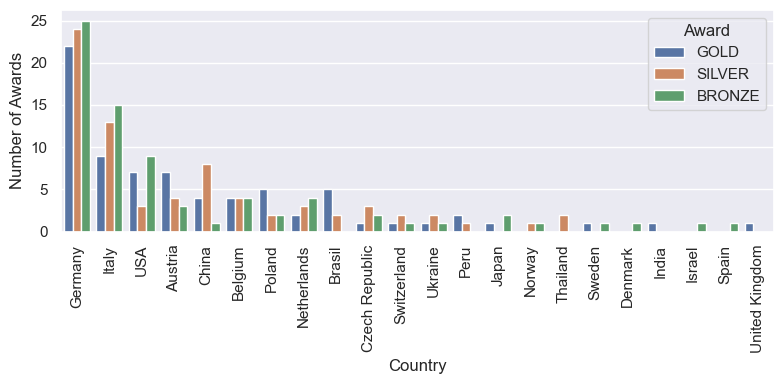

In [70]:
sns.set_palette('magma', 3)
sns.set_theme(rc={'figure.figsize':(8,4)})
ax = sns.barplot( number_of_medals, x="Country", y="Number of Awards", hue="Award", 
            hue_order=['GOLD', 'SILVER', 'BRONZE'], order=order
           )
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
# plt.savefig('medals.png', dpi=300)

In [105]:
totOrigin = df.groupby("Style Origin").Award.count().reset_index().rename(columns={"Award":"PerOrigin"})

In [122]:
df_o = df[((df.Country.isin(toptencountries)) & (df["Style Origin"] != "Other"))]
tot_number = df_o.groupby(['Country', 'Style Origin'])["Award"].count().sort_values()[::-1].reset_index()
tot_frac = tot_number.merge(totOrigin, how='left', on="Style Origin")
tot_frac["Percentage"] = tot_frac.Award / tot_frac.PerOrigin

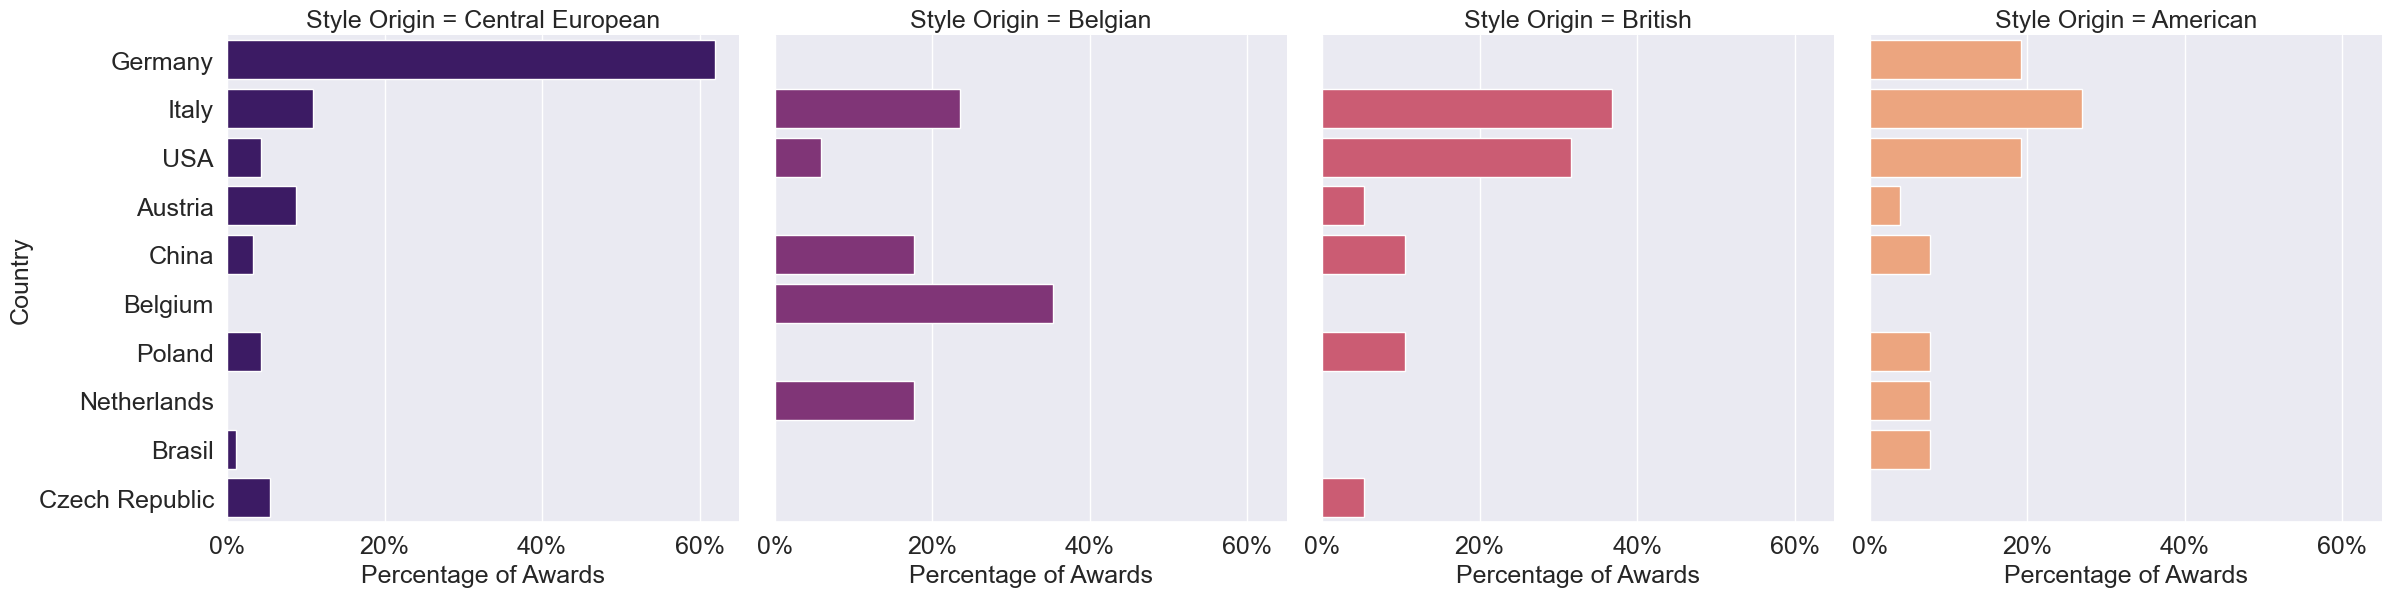

In [150]:
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18
grid = sns.FacetGrid(tot_frac, col="Style Origin", hue="Style Origin", height=6, palette='magma')
grid.map(sns.barplot, 'Percentage', 'Country', order=toptencountries)
grid.fig.tight_layout()
from  matplotlib.ticker import PercentFormatter
for ax in grid.axes.flat:
    ax.xaxis.set_major_formatter(PercentFormatter(1))
    ax.xaxis.set_label_text('Percentage of Awards', fontsize=18)
    ax.yaxis.set_label_text('Country', fontsize=18)
grid.set_titles(size=18)
# plt.savefig('style_origin.png', dpi=300)

In [155]:
onepercat = df.drop_duplicates(['Style Origin', 'Category'])
onepercat.groupby('Style Origin').Category.count()

Style Origin
American             9
Belgian             13
British              9
Central European    32
Other               11
Name: Category, dtype: int64

In [169]:
# Top 25 in number of medals per brewery
df.groupby(['Brewery', 'Country']).Award.count().sort_values(ascending=False)[:25]

Brewery                           Country    
50&50                             Italy          5
MC77 Birrificio Artigianale       Italy          5
Browar Trzech Kumpli              Poland         4
Hirsch-Brauerei Honer             Germany        4
Brewine Leopoldina                Brasil         4
Ottakringer Brauerei              Austria        4
Private Landbrauerei Schönram     Germany        4
Camba Bavaria                     Germany        3
Bierbrouwerij De Magistraat       Netherlands    3
GIUSTOSPIRITO                     Italy          3
Gebr. Müller Müllerbräu           Germany        3
Cerveza 7 VIDAS                   Peru           3
Bozner Weisse                     Italy          3
Brauerei Hirt                     Austria        3
Brouwerij Boon                    Belgium        3
Kronenbrauerei Alfred Schimpf     Germany        3
MOVA Brewing Company              Ukraine        3
Birra Perugia                     Italy          3
Birrificio Manerba                It

In [177]:
# A look at the winner!
df[df.Brewery == "50&50"]

,Category,Award,Brewery,Country,Beer,Website,Style Origin,Score
27,NEW-STYLE LAGER,GOLD,50&50,Italy,SLO MO,www.50e50.beer,American,3
83,ITALIAN GRAPE ALE,BRONZE,50&50,Italy,GRAZIELLA,www.50e50.beer,Other,1
103,PALE ALE,SILVER,50&50,Italy,KALOPSIA,www.50e50.beer,American,2
107,INDIA PALE ALE,BRONZE,50&50,Italy,DR. SHULTZ,www.50e50.beer,American,1
135,FLAVOURED OR PASTRY STOUT,GOLD,50&50,Italy,OX&DONKEY,www.50e50.beer,British,3


In [173]:
# With some scoring, assigning more points to Gold than Silver and Bronze
scoring = {'GOLD':3, 'SILVER':2, 'BRONZE':1}
df["Score"] = df.Award.apply(lambda x: scoring[x])

In [175]:
# Again a top 25
df.groupby(['Brewery', 'Country']).Score.sum().sort_values(ascending=False)[:25]

Brewery                         Country    
Hirsch-Brauerei Honer           Germany        12
Brewine Leopoldina              Brasil         11
50&50                           Italy          10
Browar Trzech Kumpli            Poland          9
Private Landbrauerei Schönram   Germany         9
MC77 Birrificio Artigianale     Italy           8
Ottakringer Brauerei            Austria         8
Gebr. Müller Müllerbräu         Germany         8
Cerveza 7 VIDAS                 Peru            8
Brouwerij Boon                  Belgium         7
Bozner Weisse                   Italy           7
Schneider Weisse                Germany         7
Stieglbrauerei zu Salzburg      Austria         7
Bierbrouwerij De Magistraat     Netherlands     7
Brauerei Hirt                   Austria         6
GIUSTOSPIRITO                   Italy           6
MOVA Brewing Company            Ukraine         6
Birrificio Lambrate             Italy           5
Bierbrouwerij De Koningshoeven  Netherlands     5
Birrif